In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Smoothing spatial filter (Mean filter)

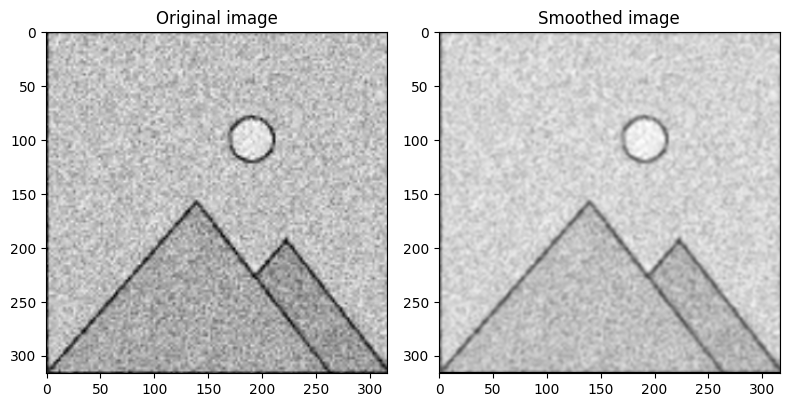

In [34]:
def meanFilter(image):
  """
    Apply 3x3 mean filter to image

    For a given pixel (i, j), the new pixel value is computed as:
    filtered_image[i, j] = (1/9) * Σ Σ image[x, y] where x ∈ {i-1, i, i+1} and y ∈ {j-1, j, j+1}
    The new value of a pixel is the average of itself and its 8 immediate neighbors
  """
  filtered_image = np.zeros((image.shape[0], image.shape[1]))

  # 3x3 mean filter
  kernel = np.ones((3, 3)) / 9

  # apply filter to each pixel (excluding border pixels)
  for i in range(1, image.shape[0] - 1):
      for j in range(1, image.shape[1] - 1):
          # extract 3x3 neighborhood pixels of current pixel
          neighborhood = image[i-1:i+2, j-1:j+2]

          # get the mean of the neighborhood
          filtered_value = np.sum(neighborhood * kernel)

          filtered_image[i, j] = filtered_value

  return filtered_image

img_path = "Resources/noisy.png"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
smoothed_img = meanFilter(original_img)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Smoothed image")
plt.imshow(smoothed_img, cmap='gray')

plt.tight_layout()
plt.show()

# Thresholding

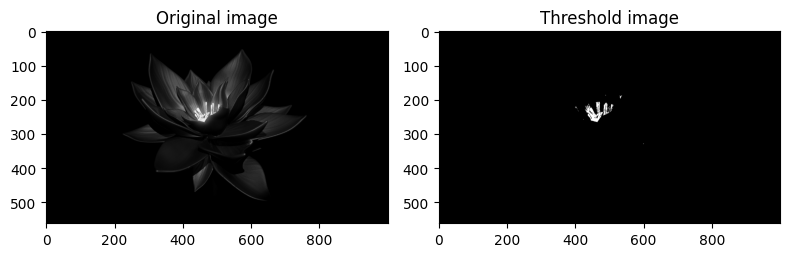

In [35]:
def thresHolding(image, threshold):
  """
  Apply thresHolding to image
  T(r) = 0 if r < threshold, else 1
  """
  T = (image >= threshold).astype(np.uint8)
  return (T * 255).astype(np.uint8)

img_path = "Resources/blackLotus.png"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
threshold_img = thresHolding(original_img, 127)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Threshold image")
plt.imshow(threshold_img, cmap='gray')

plt.tight_layout()
plt.show()

# Negative transformation

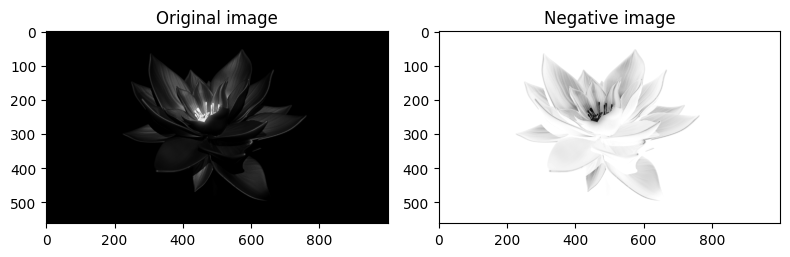

In [36]:
def negativeTransformation(image, L):
  """
  Apply negative transformation to image
  T(r) = L - 1 - r
  """
  return L - 1 - image

img_path = "Resources/blackLotus.png"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
negative_img = negativeTransformation(original_img, 256)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Negative image")
plt.imshow(negative_img, cmap='gray')

plt.tight_layout()
plt.show()

# Power law contrast stretching

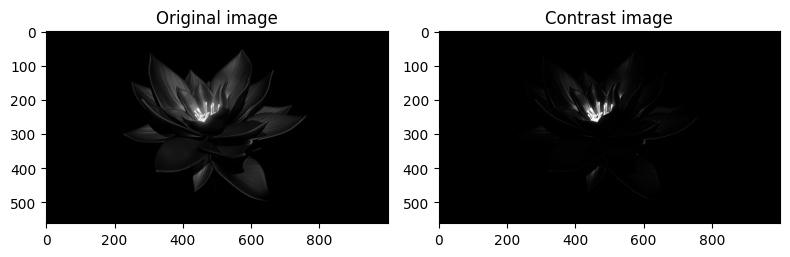

In [37]:
def powerLawContrastStretching(image, r0, s0, k):
  """
  Apply contrast stretching to image
  T(r) = s0 / (1 + exp(-k * (r - r0)))
  """
  r = image / 255.0 # normalize pixel values to [0, 1]
  T = s0 / (1 + np.exp(-k * (r - r0)))
  return (T * 255).astype(np.uint8)

img_path = "Resources/blackLotus.png"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
stretched_img = powerLawContrastStretching(original_img, r0=0.5, s0=1.0, k=10)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Contrast image")
plt.imshow(stretched_img, cmap='gray')

plt.tight_layout()
plt.show()

# Piecewise contrast stretching

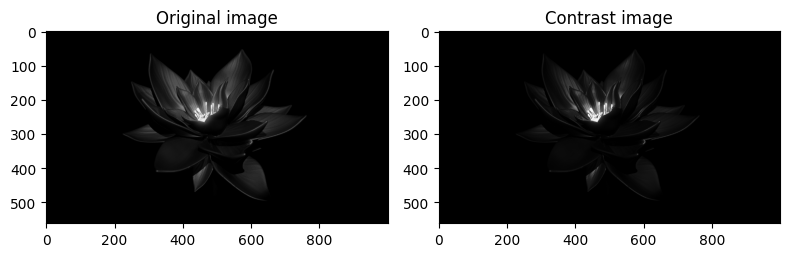

In [38]:
def piecewiseContrastStretching(image, r1, s1, r2, s2, L=256):
  """
  Apply contrast stretching to image based on the given points (r1, s1) and (r2, s2)
  T(r) = s1 / r1 * r for 0 <= r <= r1
  T(r) = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1 for r1 < r <= r2
  T(r) = ((L - 1 - s2) / (L - 1 - r2)) * (r - r2) + s2 for r2 < r <= L - 1
  """
  T = np.zeros_like(image)

  # piecewise linear transformation
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      r = image[i, j]

      if r <= r1:
        T[i, j] = s1 / r1 * r
      elif r1 < r <= r2:
        T[i, j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
      else:
        T[i, j] = ((L - 1 - s2) / (L - 1 - r2)) * (r - r2) + s2

  return np.clip(T, 0, L - 1).astype('uint8') # clip values to valid range [0, L - 1]

# control points
r1, s1 = 64, 32
r2, s2 = 192, 224

img_path = "Resources/blackLotus.png"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
contrast_img = piecewiseContrastStretching(original_img, r1=r1, s1=s1, r2=r2, s2=s2)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Contrast image")
plt.imshow(contrast_img, cmap='gray')

plt.tight_layout()
plt.show()

# Gamma correction

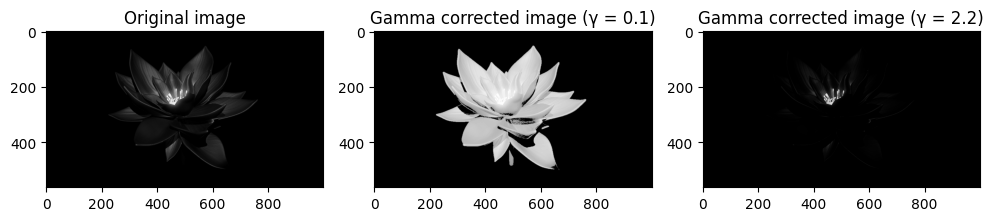

In [39]:
def gammaCorrection(image, gamma, c=1):
  """
  Apply gamma correction to image
  T(r) = c * r^γ
  """
  r = image / 255.0 # normalize pixel values to [0, 1]
  T = c * (r ** gamma)
  return (T * 255).astype('uint8')

img_path = "Resources/blackLotus.png"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
corrected_img1 = gammaCorrection(original_img, gamma=0.1, c=1)
corrected_img2 = gammaCorrection(original_img, gamma=2.2, c=1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Gamma corrected image (γ = 0.1)")
plt.imshow(corrected_img1, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Gamma corrected image (γ = 2.2)")
plt.imshow(corrected_img2, cmap='gray')

plt.tight_layout()
plt.show()

# Dynamic range compression

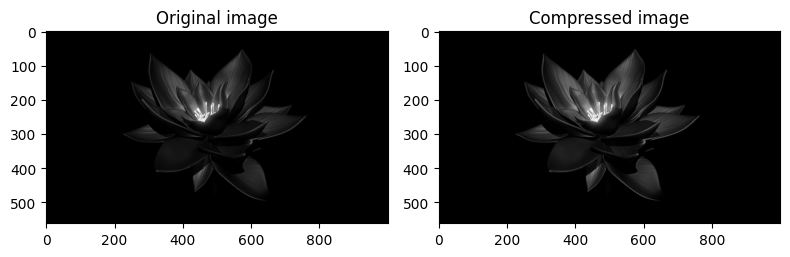

In [40]:
def dynamicRangeCompression(image, c):
  """
  Apply dynamic range compression to image
  T(r) = c * log(1 + r)

  Parameters:
    image (numpy.ndarray): The input image to be processed. Expected to be a grayscale image with intensity values in the range [0, 255].
    c (float): The constant multiplier used in the compression formula.
    Returns:
    numpy.ndarray: The image after applying dynamic range compression, with intensity values normalized to the range [0, 255].
  Formula:
    where r is the normalized intensity value of the input image.
  
  """
  r = image / 255.0 # normalize intensity values to [0, 1]
  T = c * np.log(1 + r)
  return (T / np.max(T)) * 255 # normalize compressed image to [0, 255]

img_path = "Resources/blackLotus.png"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
compressed_img = dynamicRangeCompression(original_img, c=5)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Compressed image")
plt.imshow(compressed_img, cmap='gray')

plt.tight_layout()
plt.show()